# Lab3 Assignment

Please read the variable info at 'readme.html', choose at least two sets of variables to analyze including but not limited to, showing their basic statistic and visualization.

Brief explain what you found. For example, you can show correlation between several variables and explain why their relation make sense,  or discover skewness, outlier etc for certain variables. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import skew, kurtosis

In [4]:
data1 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv')
data7 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_2019_7.csv')
data_all = pd.concat([data1, data7])

C:\Users\great\AppData\Local\Temp\ipykernel_28348\3418711595.py:1: DtypeWarning: Columns (48,69,76,77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv')
C:\Users\great\AppData\Local\Temp\ipykernel_28348\3418711595.py:2: DtypeWarning: Columns (48,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  data7 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_2019_7.csv')


In [5]:
columns_to_drop = [
    'FirstDepTime', 'TotalAddGTime', 'LongestAddGTime', 'DivAirportLandings',
    'DivReachedDest', 'DivActualElapsedTime', 'DivArrDelay', 'DivDistance',
    'Div1Airport', 'Div1AirportID', 'Div1AirportSeqID', 'Div1WheelsOn',
    'Div1TotalGTime', 'Div1LongestGTime', 'Div1WheelsOff', 'Div1TailNum',
    'Div2Airport', 'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn',
    'Div2TotalGTime', 'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum',
    'Div3Airport', 'Div3AirportID', 'Div3AirportSeqID', 'Div3WheelsOn',
    'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff', 'Div3TailNum',
    'Div4Airport', 'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn',
    'Div4TotalGTime', 'Div4LongestGTime', 'Div4WheelsOff', 'Div4TailNum',
    'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn',
    'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum'
]

data_cleaned = data_all.drop(columns=columns_to_drop)

# Drop rows with empty/null values
data_cleaned.dropna(inplace=True)

# Check for and drop duplicate rows
data_all.drop_duplicates(inplace=True)

# Examine data
data_all.head()


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2019,1,1,4,5,1/4/2019,OO,20304,OO,N945SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,4,5,1/4/2019,OO,20304,OO,N932SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,4,5,1/4/2019,OO,20304,OO,N932SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,4,5,1/4/2019,OO,20304,OO,N916SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,4,5,1/4/2019,OO,20304,OO,N107SY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1st Set of Variables - Comparing Delay Types

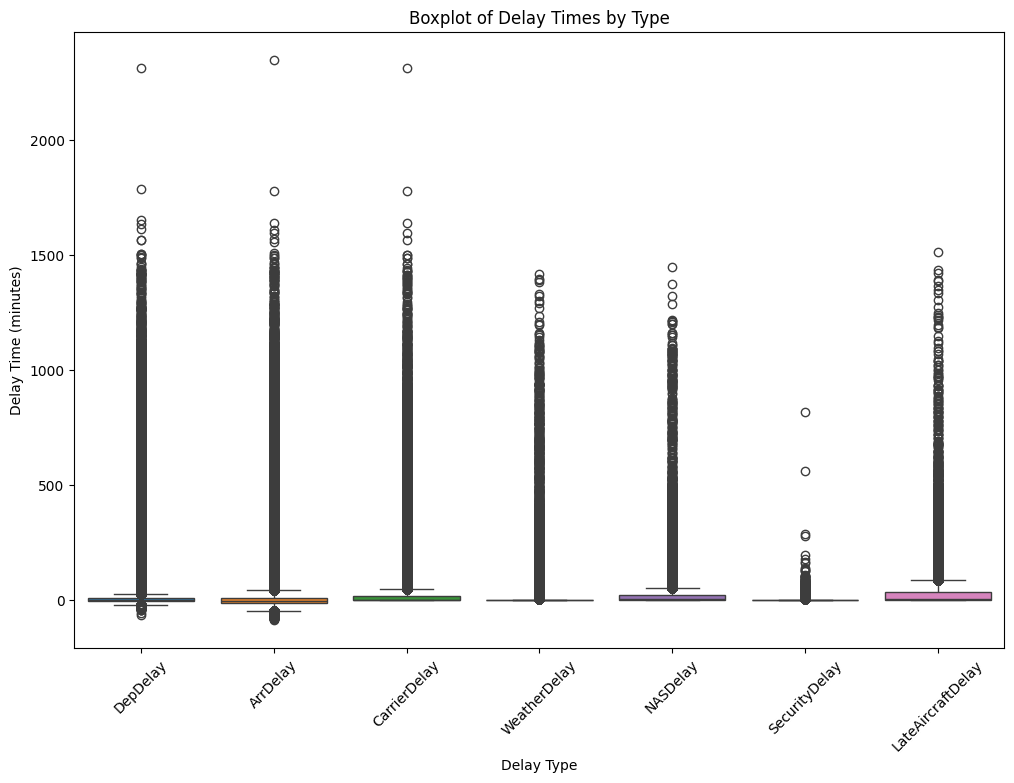

In [4]:
# Plotting boxplots for each type of delay
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_all[['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']])
plt.xlabel('Delay Type')
plt.ylabel('Delay Time (minutes)')
plt.title('Boxplot of Delay Times by Type')
plt.xticks(rotation=45)
plt.show()

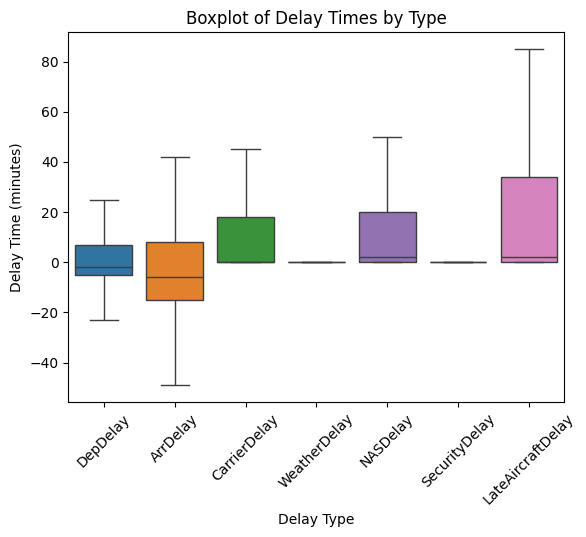

In [5]:
# Removing outliers
sns.boxplot(data=data_all[['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']], showfliers=False)

# Adjusting the y-axis scale
# plt.ylim(0, 500)  # Set a fixed range for the y-axis

plt.xlabel('Delay Type')
plt.ylabel('Delay Time (minutes)')
plt.title('Boxplot of Delay Times by Type')
plt.xticks(rotation=45)
plt.show()

The above two images plot boxplots of delay times by type. Note that the first plot reveals many outlier values for most delay types, with some extneding beyond 2000 minutes (~33 hours). The outliers and distribution of them seem reasonable given my understanding of how extreme airplane delays can get. 

Due to the outliers, it is hard to get a good look at the majority of the important data, so I created the second plot. By removing the outliers, we get a clearer view of the actual distribution of non-outlier delay times for each type. It's evident that "Late Aircraft Delay" and "Carrier Delay" have the highest median delay times. This visual representation gives a simple overview of the relative magnitudes of different delay types, which could be useful for identifying areas that need improvement in airline operations and scheduling. 

One striking thing I noticed was that "Late Aircraft Delay" sounded very similar to "Arrival Delay", yet the values were quite different. I decided to continue investigating this. An easy way to properly comapre them would be to see what value the LateAircraftDelay is for when ArrDelay is above 0 (the aircraft arrived late) and then see what values LateAircraftDelay have when ArrDelay is below 0 (the aircraft arrived early).

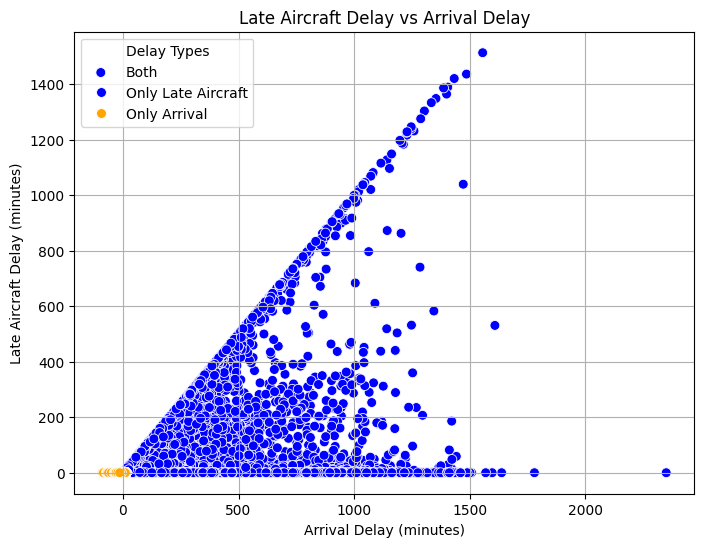

In [6]:

# Rows with both ArrDelay and LateAircraftDelay
filtered_data = data_all[['ArrDelay', 'LateAircraftDelay']].dropna()

# Rows with only LateAircraftDelay
only_late_aircraft = data_all[data_all['ArrDelay'].isnull() & data_all['LateAircraftDelay'].notnull()].reset_index(drop=True)

# Rows with only ArrDelay
only_arrival_delay = data_all[data_all['ArrDelay'].notnull() & data_all['LateAircraftDelay'].isnull()].reset_index(drop=True)

# Assign a 'type' column to store the type of delay for coloring purposes
filtered_data['type'] = 'Both'
only_late_aircraft['type'] = 'Only Late Aircraft'
only_arrival_delay['type'] = 'Only Arrival'

# Combine all data
combined_data = pd.concat([filtered_data, only_late_aircraft, only_arrival_delay])

# Fill missing values with zeros where appropriate
combined_data['ArrDelay'] = combined_data['ArrDelay'].fillna(0)
combined_data['LateAircraftDelay'] = combined_data['LateAircraftDelay'].fillna(0)

# Create a scatter plot
plt.figure(figsize=(8, 6))
palette = {'Both': 'blue', 'Only Late Aircraft': 'green', 'Only Arrival': 'orange'} 
scatter = sns.scatterplot(data=combined_data, x='ArrDelay', y='LateAircraftDelay', hue='type', palette=palette, legend='full', s=50)

plt.title('Late Aircraft Delay vs Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Late Aircraft Delay (minutes)')
plt.grid(True)

# Create the legend
plt.legend(title='Delay Types', labels=palette.keys(), loc='upper left')

plt.show()

It appears that of the 968892 times we see an ArrDelay value, 240852 are assocaited with a Late Aircraft Delay value. Based on the graph above, it seems like LateAircraftDelay can be part of what contributes to the Arrival Delay, as the Late Aircraft Delay value never exceeds the Arrival Delay value. Essentially, this lines up with our expectations of how the data should look. From here on out, since we want to investigate these Delay values together, we will not consider cases when the Arrival Delay was negative (the aircraft arrived early) or cases where the Departue Delay was negative (the aircraft departed early) so we can more closely examine situations when an aircraft was delayed.

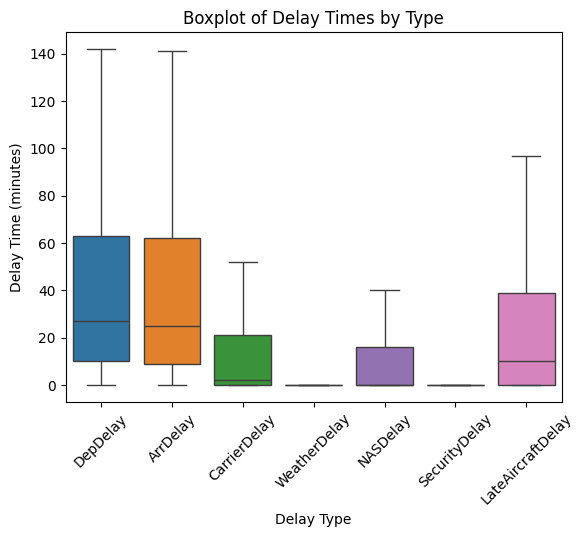

In [7]:
# Remove rows where DepDelay or ArrDelay is negative
data_all_positive_delays = data_all[(data_all['DepDelay'] >= 0) & (data_all['ArrDelay'] >= 0)]

sns.boxplot(data=data_all_positive_delays[['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']], showfliers=False)

plt.xlabel('Delay Type')
plt.ylabel('Delay Time (minutes)')
plt.title('Boxplot of Delay Times by Type')

# Adjusting the x-axis labels
plt.xticks(rotation=45)

plt.show()

Looking at these box plots now, we notice a general positive skew, where there is an elongated tail for longer delay times. However, the large amount of zero-values makes it difficult to analyze the actual delays and differences between the delay types that occured during flights (especially weather delay and security delay).

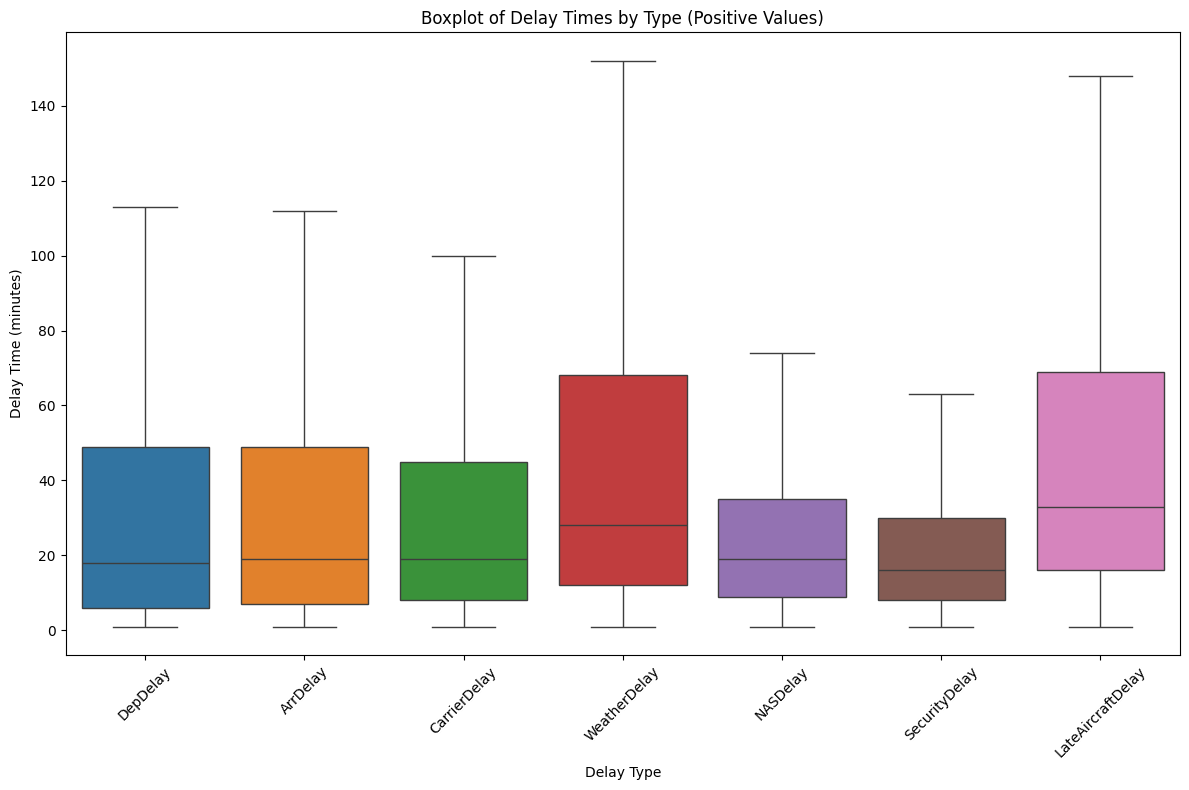

In [9]:
plt.figure(figsize=(12, 8))

# List of delay types
delay_types = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Create an empty DataFrame for boxplot data
boxplot_data = pd.DataFrame()

# For each delay type, select positive values from the dataset, reset the index, and add it to dataframe
for delay_type in delay_types:
    # Use reset_index(drop=True) to remove the existing index and replace it with a default integer index.
    delay_data = data_all.loc[data_all[delay_type] > 0, delay_type].reset_index(drop=True)
    boxplot_data[delay_type] = delay_data

sns.boxplot(data=boxplot_data, showfliers=False)
plt.title('Boxplot of Delay Times by Type (Positive Values)')
plt.xlabel('Delay Type')
plt.ylabel('Delay Time (minutes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This plot provides insight into the duration of each type of delay when it occurs (when the delay time value is positive). Notably, we now see that when weather delays occur, they cause a very large amount of delay, comparable to Late Aircraft Delay. We also see that Security Delay and Carrier Delay on average cause the shortest length delays.

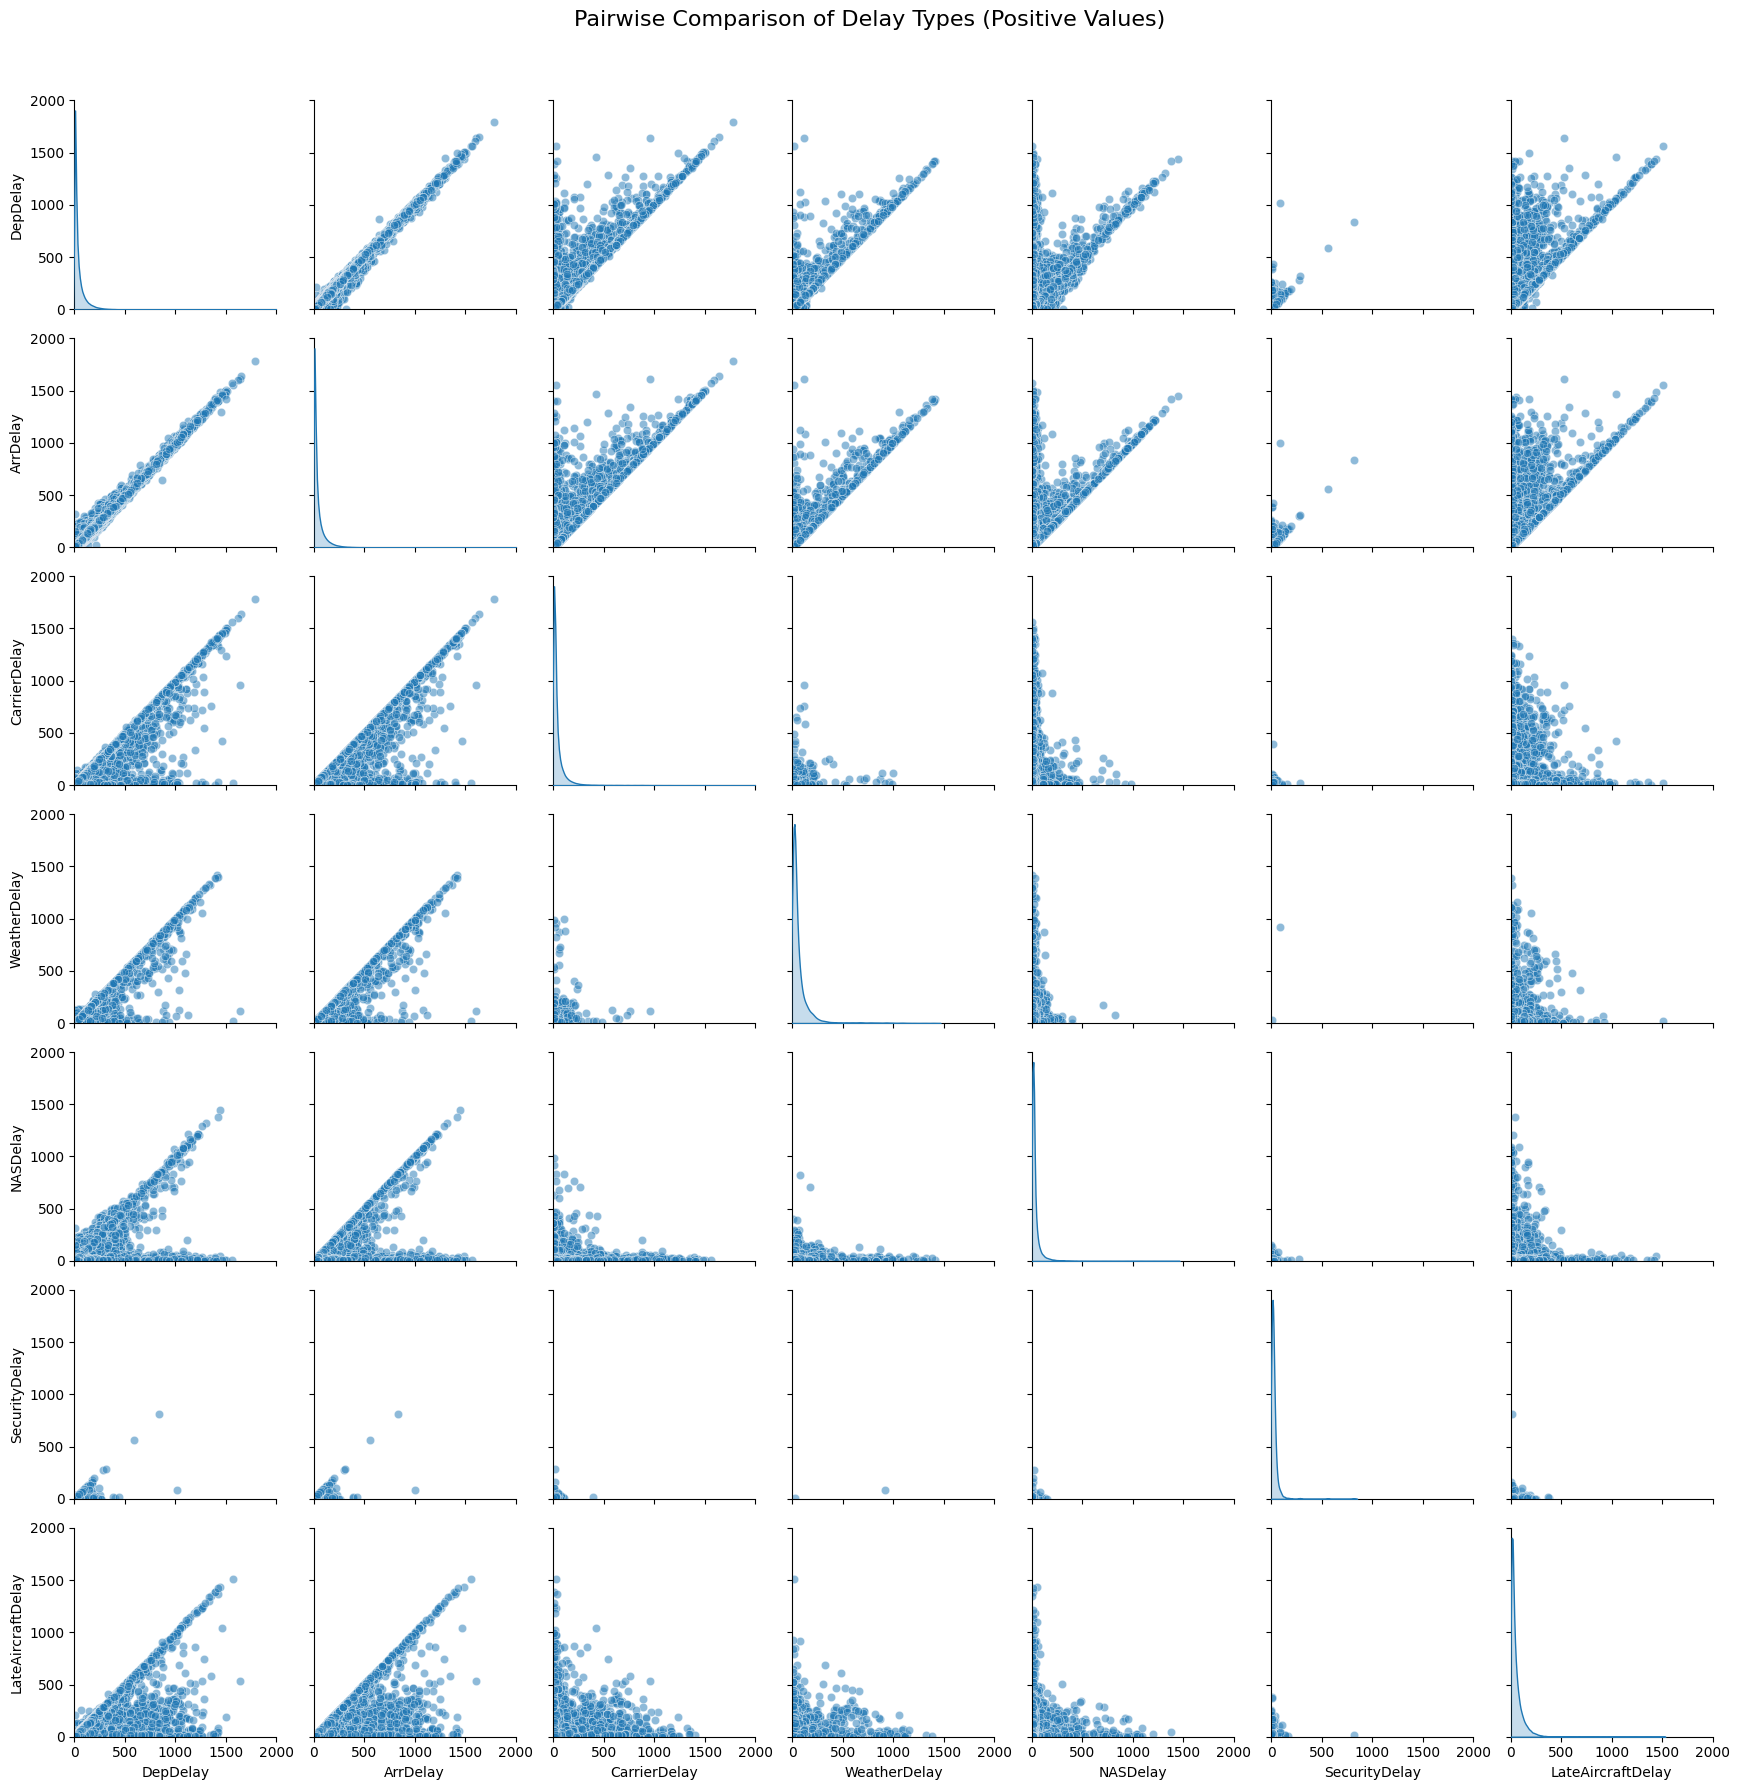

In [10]:
# List of delay types
delay_types = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Create a DataFrame with positive values for each delay type, reset index to get unique indices
positive_delay_data = data_all[delay_types][data_all[delay_types] > 0].reset_index(drop=True)

# Create a pairplot for all delay types
g = sns.pairplot(positive_delay_data, diag_kind='kde', plot_kws={'alpha': 0.5})

plt.suptitle('Pairwise Comparison of Delay Types (Positive Values)', y=1.02, fontsize=16)

# Consistently scale every scatterplot from 0 to 2000
axes = g.axes.flatten()
for ax in axes:
    ax.set_xlim(0, 2000)
    ax.set_ylim(0, 2000)

plt.tight_layout()
plt.show()

It appears that there's a very strong correlation between Arrival and Delay, which makes sense as the departure time should be directly impacted by the arrival time, you can't depart on time if arrival did not occur on time. Other correlations are not immediately apparent yet based on the above plots.

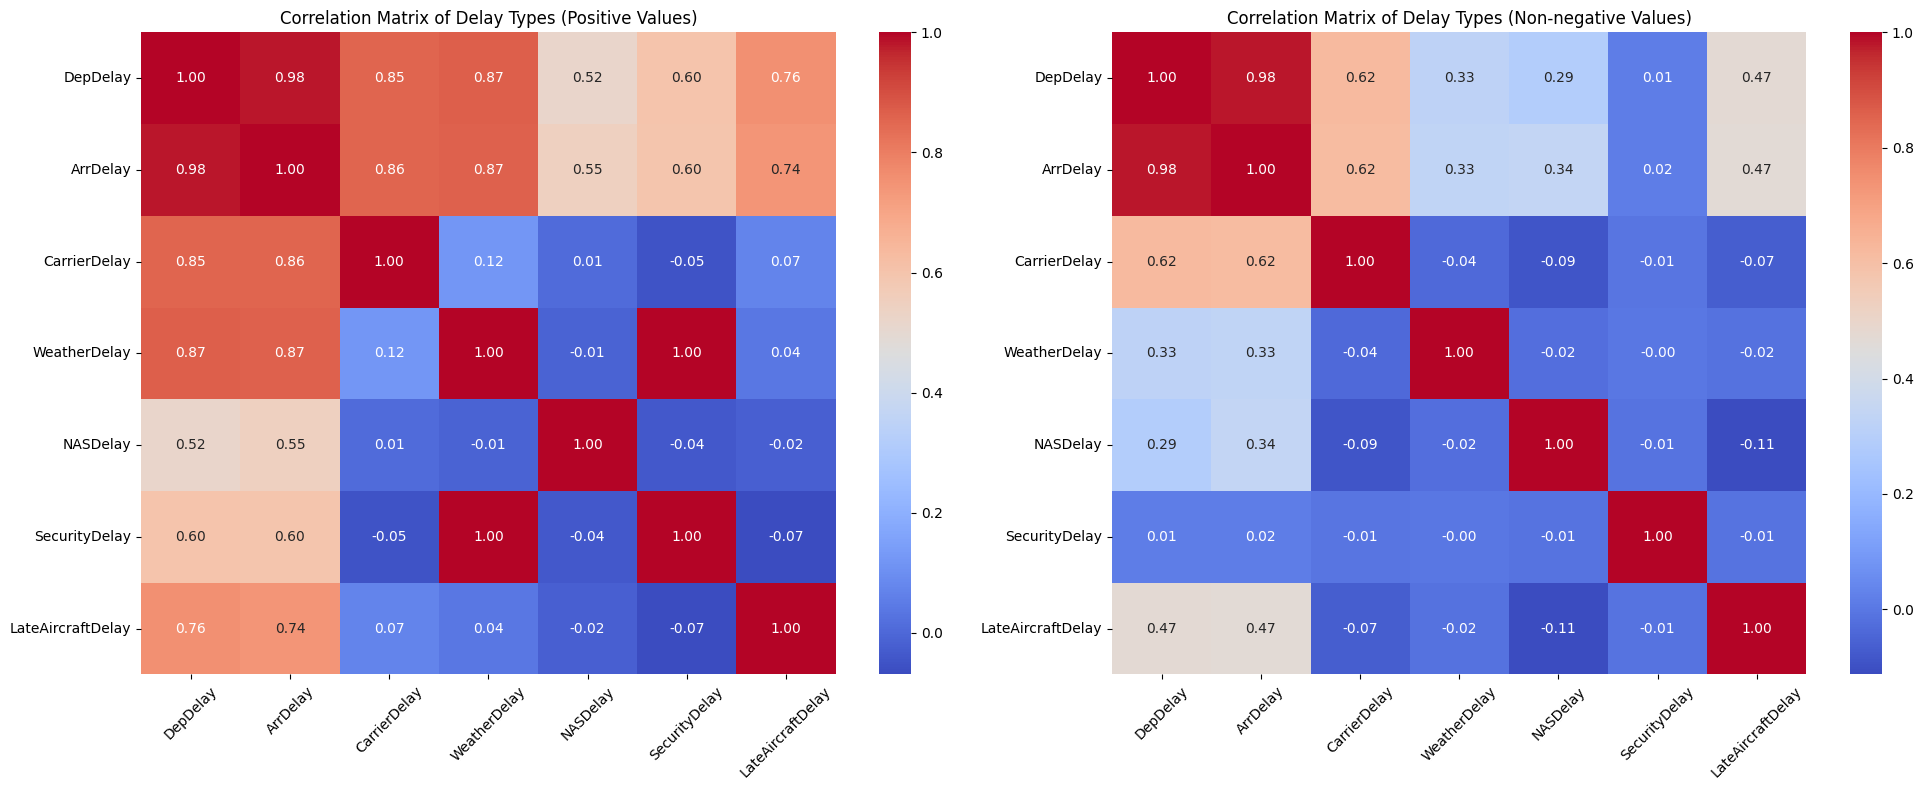

In [11]:

# List of delay types
delay_types = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Create two DataFrame with positive and non-negative values for each delay type
positive_delay_data = data_all[delay_types][data_all[delay_types] > 0]
non_negative_delay_data = data_all[delay_types][data_all[delay_types] >= 0]

# Calculate the correlation matrices
positive_correlation_matrix = positive_delay_data.corr()
non_negative_correlation_matrix = non_negative_delay_data.corr()

# Create a new figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a heatmap of the positive correlation matrix in the first subplot
sns.heatmap(positive_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax1)
ax1.set_title('Correlation Matrix of Delay Types (Positive Values)')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

# Create a heatmap of the non-negative correlation matrix in the second subplot
sns.heatmap(non_negative_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax2)
ax2.set_title('Correlation Matrix of Delay Types (Non-negative Values)')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.yaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

These Correlation Matrices show us how correlated each values were. The matrix on the left shows correlations between delay values when all delay values were positive, while the matrix on the right shows correlations overall. From an overall viewpoint we notice that correlations are weaker between the specific delay types and the always present Departure and Arrival Delays in the matrix on the right, which makes sense. We would only see a correlation emerge when we don't consider the cases when the delay did not occur. When a delay does occur, we can quantifiably see every specific delay type has a correlation above 0.5 with Departure Delay and Arrival Delay, and we can also now see that Departure Delay and Arrival Delay have a positive correlation of 0.98, which both align with our expectations.

From there, we can notice some specific things like how NAS Delay is the least correlated at just 0.52 with Departure Delay and 0.55 with Arrival Delay. NAS delays in general are caused by facotrs external to a specific flight's control, such as air traffic control or heavy traffic volume, and may happen more irrespectively of when a flight departs or arrives, thus those values don't align as much. The Carrier Delay and Weather Delay are most correlated with ArrDelay and DepDelay, which makes sense because these types of delays are directly related to the processes and conditions that affect the operation of an aircraft; things like aircraft maintenance, baggage loading, and severe weather conditions.

From there, we can look at the correlations between the sub-types of delays an aircraft may experience. They are all low and effectively negligible, which absolutely makes sense as one type of delay here should not have much influence over another. The only outlier here is the correlation of 1 we see between Weather Delay and Security Delay, but that isn't actually representative of their correlation, there were only two cases where a weather delay and a security delay both occured. On that note, it is worth mentioning that there is less data on the special sub-types of delays than there is data on the overall departure and arrival delay, and our values may not be fully representative of all delay causes.

## 2nd Set of Variables - Comparing Distance and AirTime

In [6]:
data_clean = data_all[['Distance', 'AirTime']].dropna()

print(data_clean.describe())

           Distance       AirTime
count  1.209744e+06  1.209744e+06
mean   8.090145e+02  1.120373e+02
std    5.999989e+02  7.087032e+01
min    3.100000e+01  4.000000e+00
25%    3.690000e+02  6.000000e+01
50%    6.440000e+02  9.300000e+01
75%    1.044000e+03  1.410000e+02
max    5.095000e+03  6.910000e+02


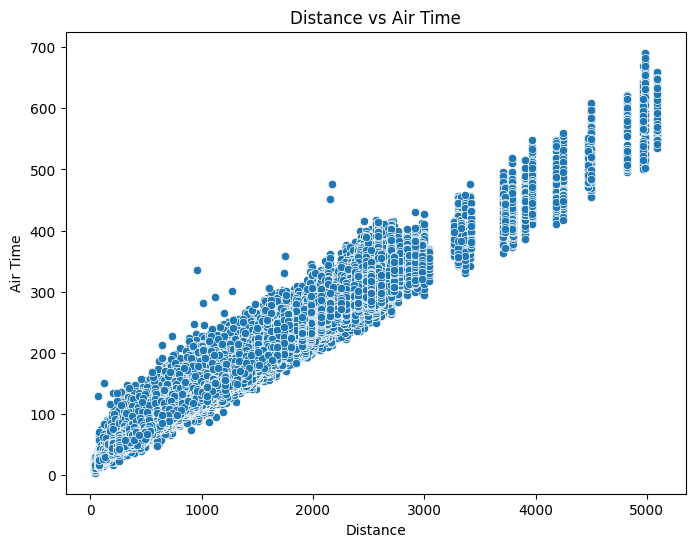

In [9]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance', y='AirTime', data=data_clean)
plt.xlabel('Distance')
plt.ylabel('Air Time')
plt.title('Distance vs Air Time')
plt.show()


By plotting a scatterplot, we can see a clear linear positive trend here, and we are able to calcaulte that there is a positive strong correlation between the two variables. This intuitively makes a lot of sense, as the air time of a flight is directly dependant on how long the flight lasts. 

At first I thought it was strange that there were gaps at higher distances, from 3000 to 5000. However this is simply because there are many flights that go between the same airports, which are the same far distance apart from each other, yet had different air times.

In [10]:
# Calculate Pearson correlation coefficient and the p-value
corr, _ = pearsonr(data_clean['Distance'], data_clean['AirTime'])
print('Pearsons correlation coefficient between Distance and Air Time: %.3f' % corr)

Pearsons correlation coefficient between Distance and Air Time: 0.985


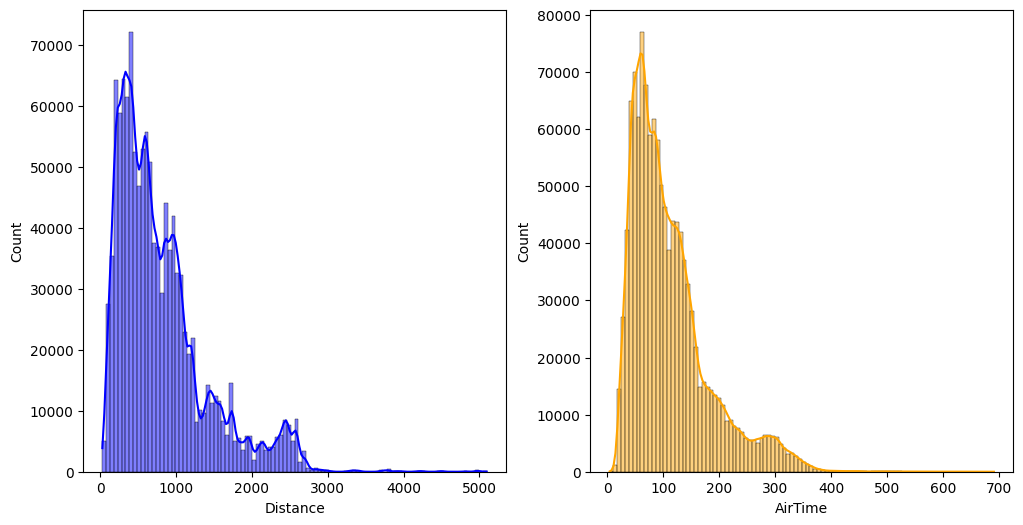

In [11]:
# Histograms
fig, ax =plt.subplots(1,2, figsize=(12, 6))
sns.histplot(data=data_clean, x="Distance", bins=100, kde=True, color="blue", ax=ax[0])
sns.histplot(data=data_clean, x="AirTime", bins=100, kde=True, color="orange", ax=ax[1])
plt.show()

In [12]:
# calculate Skewness and Kurtosis 
skw_distance = skew(data_clean['Distance'])
skw_airtime = skew(data_clean['AirTime'])

krt_distance = kurtosis(data_clean['Distance'])
krt_airtime = kurtosis(data_clean['AirTime'])

print(f"Skewness of Distance: {skw_distance} | Skewness of Air Time: {skw_airtime}")
print(f"Kurtosis of Distance: {krt_distance} | Kurtosis of Air Time: {krt_airtime}")

Skewness of Distance: 1.4885389959748472 | Skewness of Air Time: 1.4372808245209578
Kurtosis of Distance: 2.6049863271218134 | Kurtosis of Air Time: 2.3818444767029057


We see that both the Distance and Air Time distributions have a positive skewness greater than 1, indicating that most flight durations and distances are on the lower side, and that the distance and air time flights travel is not normal. The Kurtosis values of 2.6 and 2.38 indicated that the outliers were particularly extreme in our dataset. 

This result inspired me to then investigate if we observe there is a normal distribution of Air Times for flights that cover the same Distances.

In [13]:
# Distance Binning/Grouping
distance_bins = pd.cut(data_all['Distance'], bins=range(0, int(data_all['Distance'].max()) + 50, 50))   
data_all['Distance_Bins'] = distance_bins

grouped_df = data_all.groupby('Distance_Bins')['AirTime'] 

# Collecting statistics for each group
group_statistics = grouped_df.agg([np.mean, np.median, np.std, 'skew', 'count'])
print(group_statistics)

                     mean  median        std      skew  count
Distance_Bins                                                
(0, 50]         13.686486    13.0   3.576357  0.894361    370
(50, 100]       23.460899    23.0   4.612922  2.156772  15639
(100, 150]      29.255562    29.0   5.251165  1.489106  27821
(150, 200]      37.235292    36.0   6.373419  1.448870  48918
(200, 250]      43.408001    43.0   5.677043  1.712273  62245
...                   ...     ...        ...       ...    ...
(4850, 4900]          NaN     NaN        NaN       NaN      0
(4900, 4950]          NaN     NaN        NaN       NaN      0
(4950, 5000]   577.449393   573.0  44.792254  0.300110    247
(5000, 5050]          NaN     NaN        NaN       NaN      0
(5050, 5100]   594.647059   593.0  37.277244  0.092066     51

[102 rows x 5 columns]


C:\Users\great\AppData\Local\Temp\ipykernel_28348\1982025464.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = data_all.groupby('Distance_Bins')['AirTime']
C:\Users\great\AppData\Local\Temp\ipykernel_28348\1982025464.py:8: FutureWarning: The provided callable <function mean at 0x00000186FFF0D080> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  group_statistics = grouped_df.agg([np.mean, np.median, np.std, 'skew', 'count'])
C:\Users\great\AppData\Local\Temp\ipykernel_28348\1982025464.py:8: FutureWarning: The provided callable <function median at 0x0000018686233D80> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable wi

In [14]:
# Testing normality for each bin if it contains enough samples
for name, group in grouped_df:
    if group.count() > 500: 
        stat, p = shapiro(group.sample(500)) 
        if p > 0.05:
            print(f'Data in the bin {name} seems to be normally distributed')
        else:
            print(f'Data in the bin {name} does not seem to be normally distributed')

Data in the bin (50, 100] seems to be normally distributed
Data in the bin (100, 150] seems to be normally distributed
Data in the bin (150, 200] seems to be normally distributed
Data in the bin (200, 250] seems to be normally distributed
Data in the bin (250, 300] seems to be normally distributed
Data in the bin (300, 350] seems to be normally distributed
Data in the bin (350, 400] seems to be normally distributed
Data in the bin (400, 450] seems to be normally distributed
Data in the bin (450, 500] seems to be normally distributed
Data in the bin (500, 550] seems to be normally distributed
Data in the bin (550, 600] seems to be normally distributed
Data in the bin (600, 650] seems to be normally distributed
Data in the bin (650, 700] seems to be normally distributed
Data in the bin (700, 750] seems to be normally distributed
Data in the bin (750, 800] seems to be normally distributed
Data in the bin (800, 850] seems to be normally distributed
Data in the bin (850, 900] seems to be no

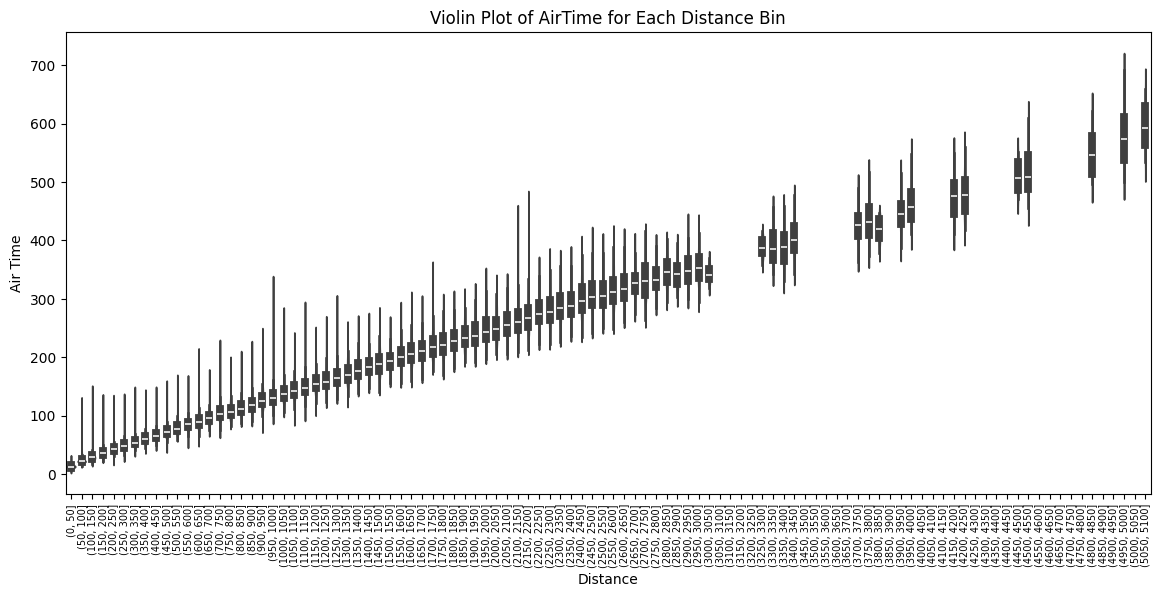

In [19]:
plot_data = data_all.reset_index()

plt.figure(figsize=(14,6))
sns.violinplot(x='Distance_Bins', y='AirTime', data=plot_data)
plt.xticks(rotation=90, fontsize=7)
plt.xlabel('Distance')
plt.ylabel('Air Time')
plt.title('Violin Plot of AirTime for Each Distance Bin')
plt.show()

The above analysis of normal distributions and the plot above, especially the distributions for longer distances which are affected less by short term flight disturbances, prove my hypothesis that for a given distance, the specific amount of air time an airplane takes is a normal distribution. Thus, we'll be able to predict with a higher degree of accuracy the expected air time for a flight within a certain distance range, and we can investigate significant variations from the expected air time. 

For example, one of the biggest outliers is in the range from 2150 to 2250, where the Air Time of 476 was far above the usual range of 220-250. This difference can be attributed to an unusually large Late Aircraft Delay of 252, which when subtracted results in an actual Air Time of 224, which then lines up with our expectations. It appears that Frontier Airlines (F9) is the result of the three most notable outliers here, which does seem to make sense considering news articles attributing this airline to heavy delays (e.g. [this article](https://www.denverpost.com/2017/09/15/frontier-fined-for-passengers-on-tarmac/))